# Naive Bayes
# Question_2 Salary Data Train

In [1]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Naive Bayes
# Dataset : Salary Data Train

In [2]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Import the dataset

salary=pd.read_csv(r'D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Naive Bayes\SalaryData_Train.csv')

In [4]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# To get the basic idea of the dataset

salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
# Changing the data types of the columns to categorical

salary['workclass']=salary['workclass'].astype('category')
salary['education']=salary['education'].astype('category')
salary['maritalstatus']=salary['maritalstatus'].astype('category')
salary['occupation']=salary['occupation'].astype('category')
salary['relationship']=salary['relationship'].astype('category')
salary['race']=salary['race'].astype('category')
salary['native']=salary['native'].astype('category')
salary['sex']=salary['sex'].astype('category')

In [7]:
# checking the data types of the data

salary.dtypes

age                 int64
workclass        category
education        category
educationno         int64
maritalstatus    category
occupation       category
relationship     category
race             category
sex              category
capitalgain         int64
capitalloss         int64
hoursperweek        int64
native           category
Salary             object
dtype: object

In [8]:
# Importing the labelencoder 

from sklearn import preprocessing                      
label_encoder = preprocessing.LabelEncoder()

In [9]:
# encoding the salary column

salary['Salary'] = label_encoder.fit_transform(salary['Salary'])

In [10]:
salary.Salary[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: Salary, dtype: int32

In [11]:
# encoding the rest data

salary['workclass'] = label_encoder.fit_transform(salary['workclass'])
salary['education'] = label_encoder.fit_transform(salary['education'])
salary['maritalstatus'] = label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation'] = label_encoder.fit_transform(salary['occupation'])
salary['relationship'] = label_encoder.fit_transform(salary['relationship'])
salary['race'] = label_encoder.fit_transform(salary['race'])
salary['sex'] = label_encoder.fit_transform(salary['sex'])
salary['native'] = label_encoder.fit_transform(salary['native'])

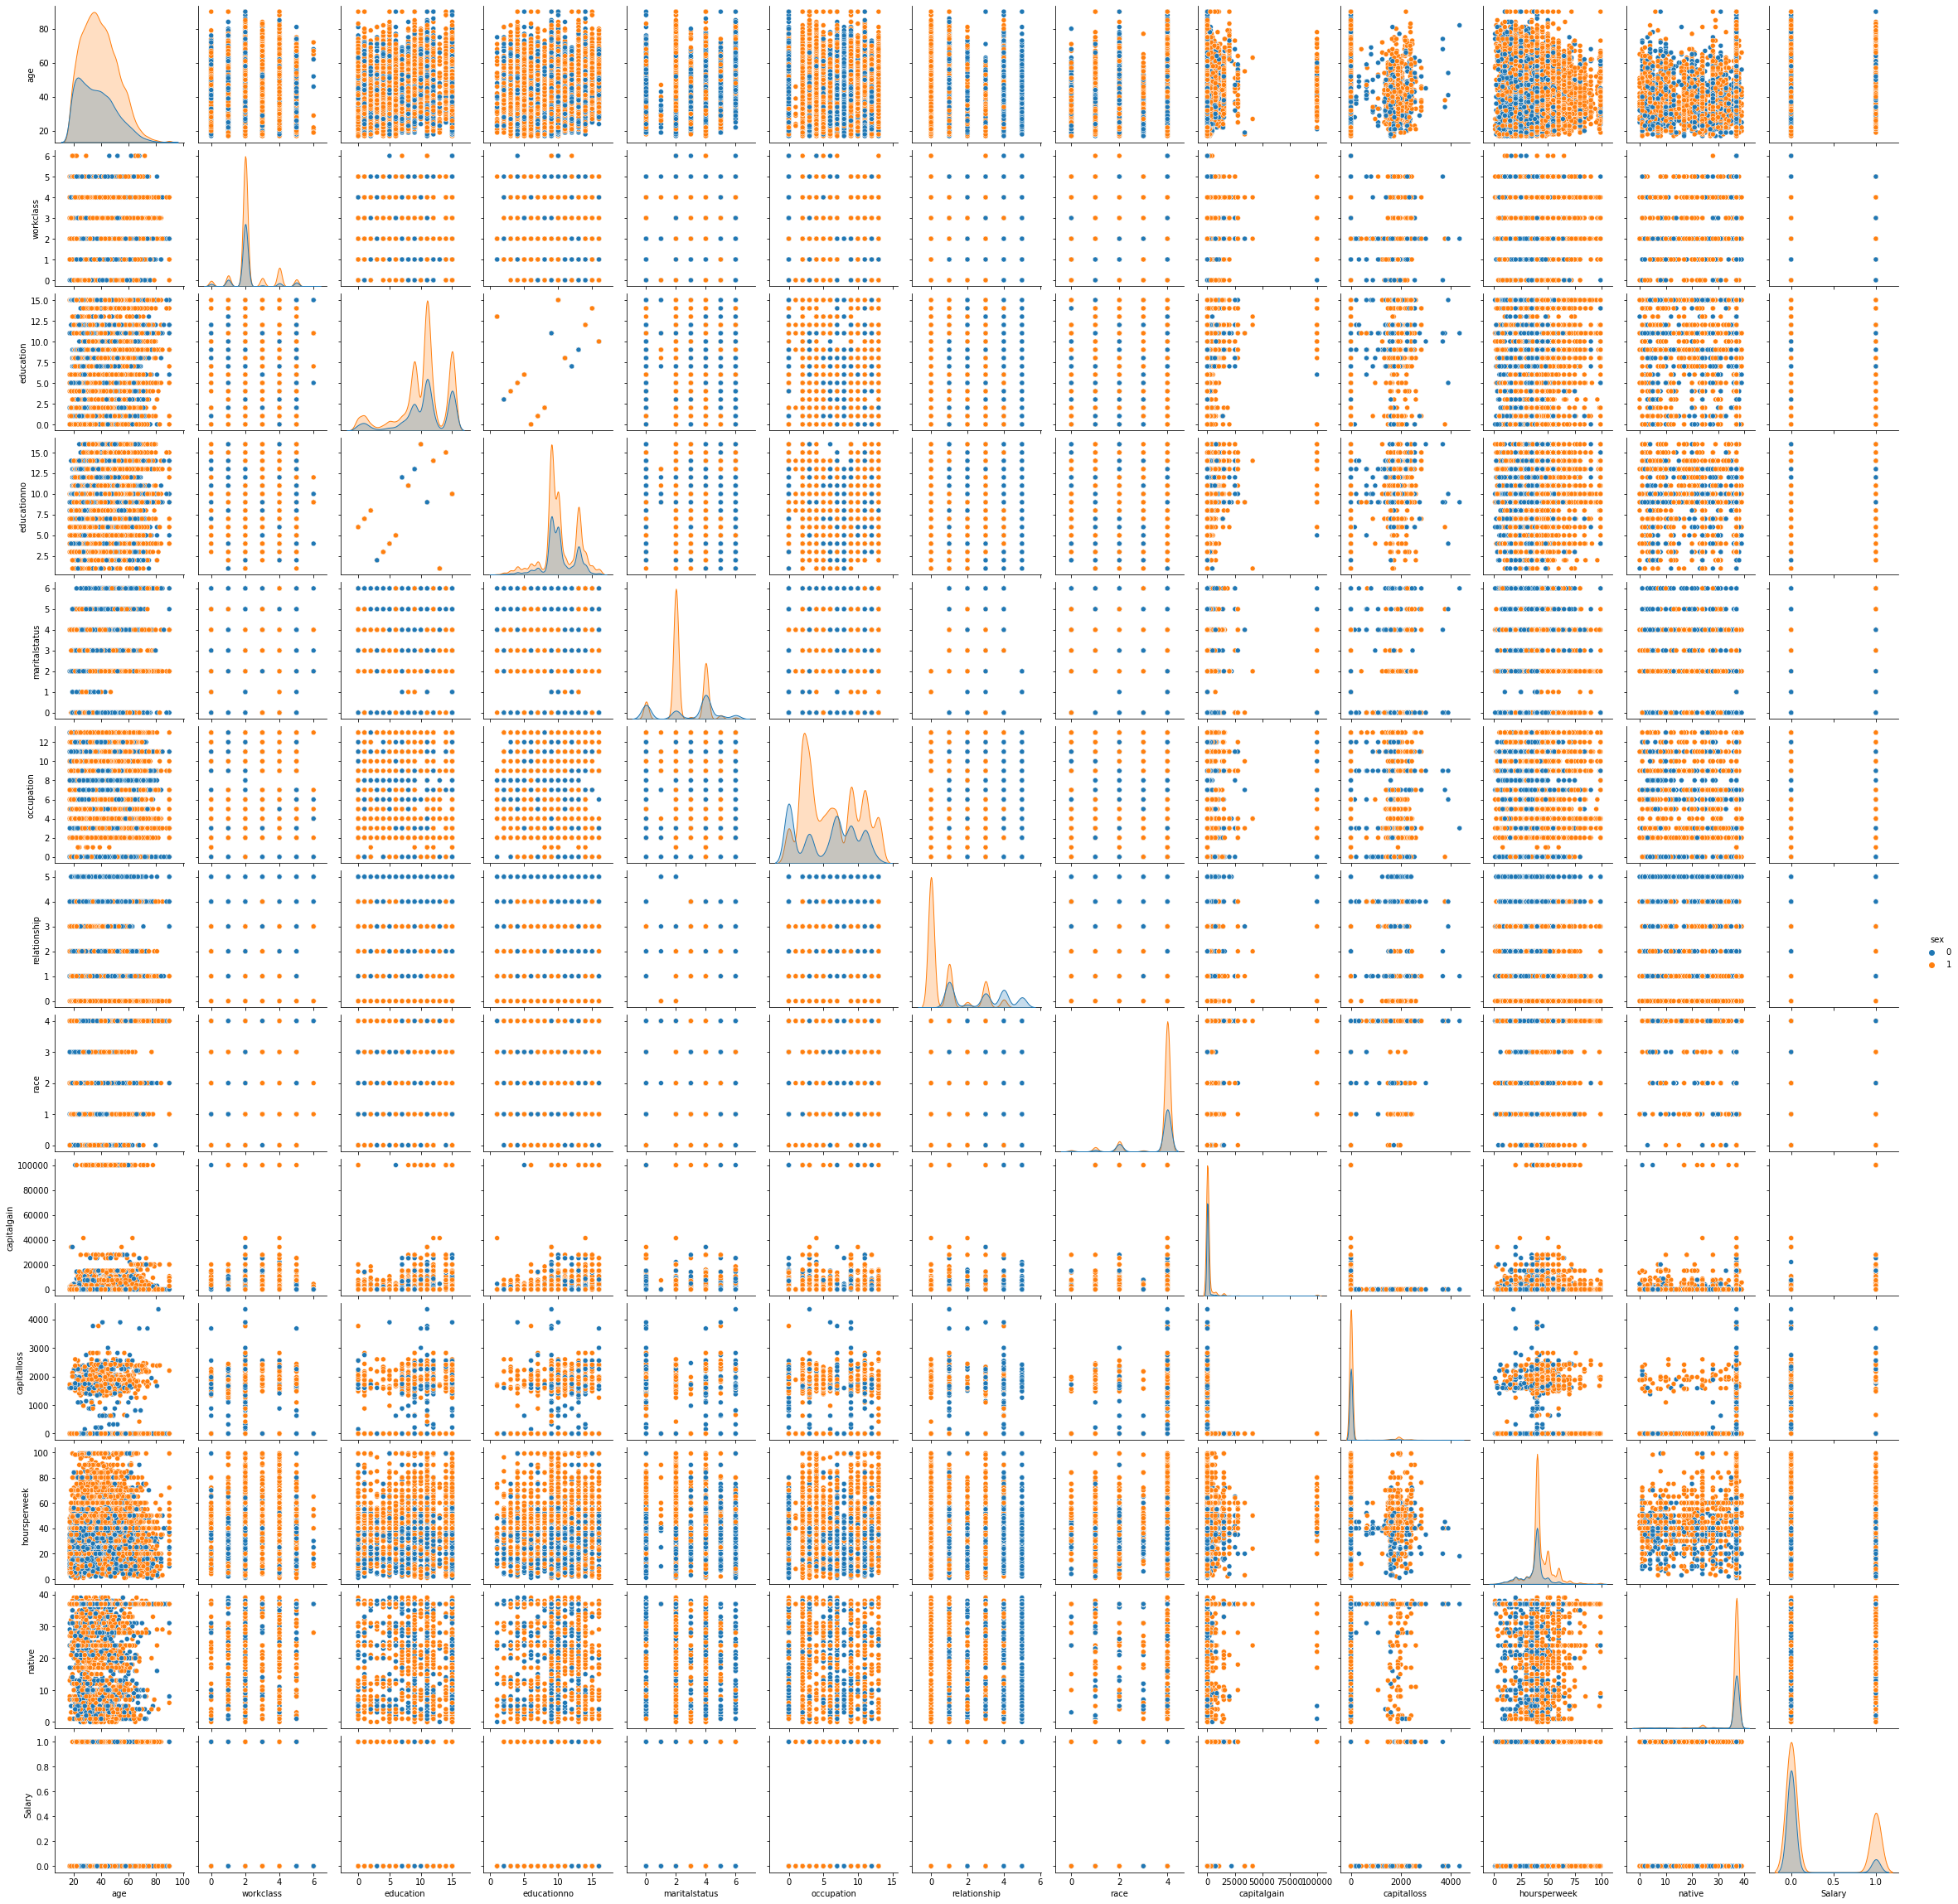

In [12]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

# pairplot with hue sex
seaborn.pairplot(salary, hue ='sex')
# to show
plt.show()

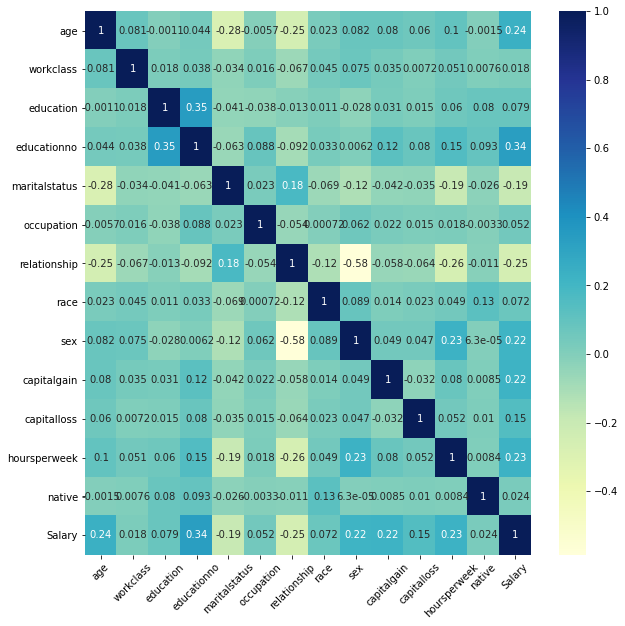

In [13]:
plt.figure(figsize=(10, 10))
seaborn.heatmap(salary.corr(), cmap="YlGnBu", annot=True)  
plt.xticks(rotation='45')
# displaying heatmap
plt.show()

In [14]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Transform Data
scaled = scaler.fit_transform(salary)

In [15]:
scaled = pd.DataFrame(scaled)

In [16]:
scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564,0.0


In [17]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

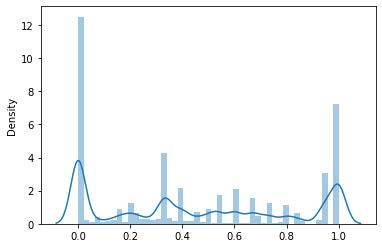

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns 
import matplotlib.pyplot as plt

sns.distplot(scaled)
plt.show()

In [19]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [20]:
# Splitting the data into X (features) and Y (target) as input and output

X = salary.iloc[:,0:13]
Y = salary.iloc[:,13]

In [21]:
X.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [22]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

In [23]:
# checking the unique data of the salary column

salary.Salary.unique()

array([0, 1])

In [24]:
# counting the points in the salary columns unique data

salary.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [25]:
# Splitting the data into training and test dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [26]:
# initializing

gnb=GaussianNB()

In [27]:
# getting the perfectly fitted data using the GaussianNB module

gnb.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred = gnb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", round(accuracy, 2))

Accuracy = 79.38


In [29]:
# checking the crosstable 

pd.crosstab(y_pred,y_test)

Salary,0,1
row_0,,
0,6463,1531
1,335,720


In [30]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])